In [1]:
import numpy as np
import matplotlib.pyplot as plt

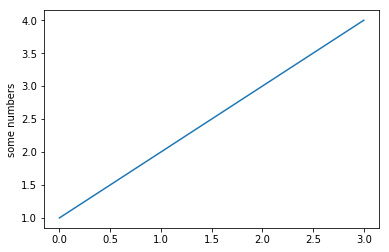

In [2]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

If you provide a single list or array to the **plot( )** command, matplotlib assumes it is a sequence of **y** values, and automatically generates the **x** values for you. Since python ranges start with 0, the default **x** vector has the same length as **y** but starts with 0. Hence the **x** data are **[0,1,2,3]**.

**plot( )** is a versatile command, and will take an arbitrary number of arguments. For example, to plot **x** versus **y**, you can issue the command:
<pre>plt.plot([1, 2, 3, 4], [1, 4, 9, 16])</pre>

For every **x, y** pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. 

The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string.

The default format string is **'b-'**, which is a solid blue line. For example, to plot the above with red circles, you would issue:

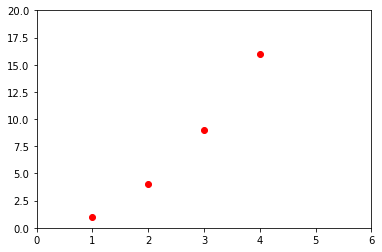

In [3]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

The **axis( )** command in the example above takes a list of **[xmin, xmax, ymin, ymax]** and specifies the viewport of the axes.

If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use **numpy arrays**. In fact, all sequences are converted to **numpy arrays** internally. The example below illustrates a plotting several lines with different format styles in one command using arrays.

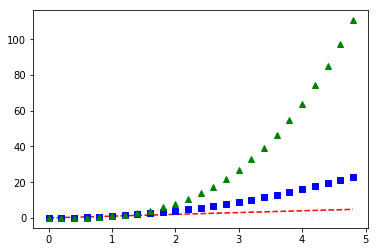

In [4]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

# Controlling line properties
Lines have many attributes that you can set: linewidth, dash style, antialiased. There are several ways to set line properties:
* Use keyword args:
<pre>plt.plot(x, y, linewidth=2.0)</pre>
* Use the setter methods of a Line2D instance. plot returns a list of Line2D objects: e.g.,**line1, line2 = plot(x1, y1, x2, y2)**.In the code below we will suppose that we have only one line so that the list returned is of length 1. We use tuple unpacking with line, to get the first element of that list:
<pre>line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialising</pre>
* Use the **setp()** command. The example below uses a MATLAB-style command to set multiple properties on a list of lines. **setp** works transparently with a list of objects or a single object. You can either use python keyword arguments or MATLAB-style string/value pairs:
<pre>lines = plt.plot(x1, y1, x2, y2)
# use keyword args
plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)</pre>

To get a list of settable line properties, call the **setp()** function with a line or lines as argument.

In [5]:
lines = plt.plot([1, 2, 3])
plt.setp(lines)

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  antialiased or aa: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: string or anything printable with '%s' conversion. 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash

# Working with multiple figures and axes
MATLAB, and pyplot, have the concept of the current figure and the current axes. All plotting commands apply to the current axes. 

The function **gca( )** returns the current axes (a **matplotlib.axes.Axes** instance), and **gcf( )** returns the current figure (**matplotlib.figure.Figure** instance). Normally, you don’t have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

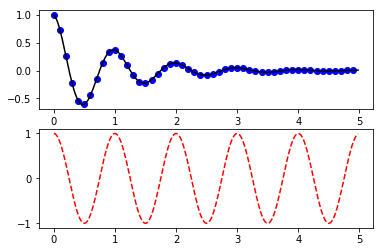

In [6]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

The **figure( )** command here is optional because figure(1) will be created by default, just as a subplot(111) will be created by default if you don’t manually specify any axes. 

The **subplot( )** command specifies **numrows, numcols, fignum** where fignum ranges from 1 to numrows\*numcols. The commas in the **subplot** command are optional if *numrows*numcols < 10*.

You can create multiple figures by using multiple **figure( )** calls with an increasing figure number. Of course, each figure can contain as many axes and subplots as your heart desires:

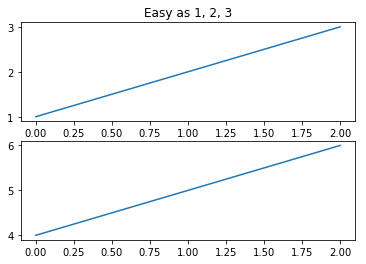

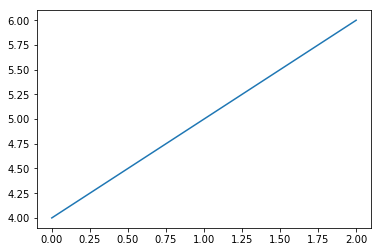

In [7]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

plt.show()

You can clear the current figure with **clf( )** and the current axes with **cla( )**.

If you are making lots of figures, you need to be aware of one more thing: the memory required for a figure is not completely released until the figure is explicitly closed with **close( )**.

# Working with text
The **text( )** command can be used to add text in an arbitrary location, and the **xlabel( ), ylabel( ) and title( )** are used to add text in the indicated locations.

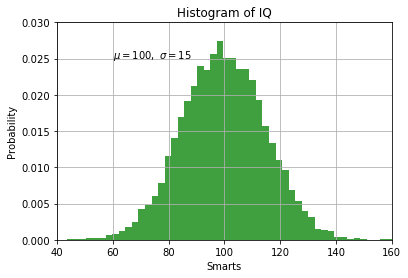

In [8]:
# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

All of the **text( )** commands return an **matplotlib.text.Text** instance. Just as with with lines above, you can customize the properties by passing keyword arguments into the text functions or using **setp()**:
<pre>t = plt.xlabel('my data', fontsize=14, color='red')</pre>

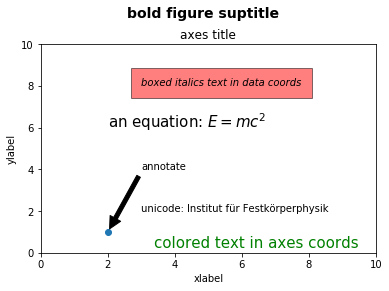

In [9]:
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

## Using mathematical expressions in text
matplotlib accepts TeX equation expressions in any text expression. For example to write the expression $\sigma_i=15$ in the title, you can write a $\LaTeX$ (LATEX) expression surrounded by dollar signs:
<pre>plt.title(r'$\sigma_i=15$')</pre>

The **r** preceding the title string is important – it signifies that the string is a raw string and not to treat backslashes as python escapes.

## Annotating text
A common use for text is to annotate some feature of the plot, and the **annotate( )** method provides helper functionality to make annotations easy. 

In an annotation, there are two points to consider: the location being annotated represented by the argument **xy** and the location of the text **xytext**. Both of these arguments are **(x, y)** tuples.

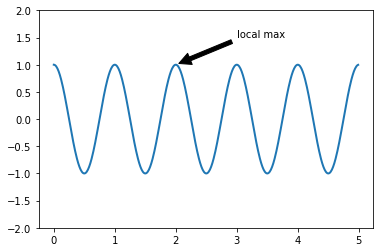

In [10]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

# Logarithmic and other nonlinear axis
**matplotlib.pyplot** supports not only linear axis scales, but also logarithmic and logit scales. This is commonly used if data spans many orders of magnitude. Changing the scale of an axis is easy:
<pre>plt.xscale(‘log’)</pre>
An example of four plots with the same data and different scales for the **y** axis is shown below.

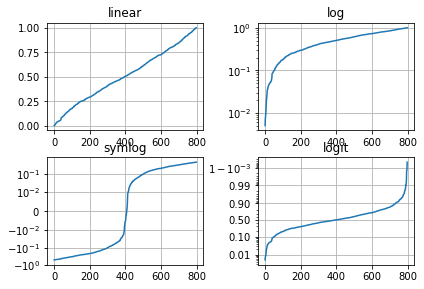

In [11]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()